In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.colors as colors

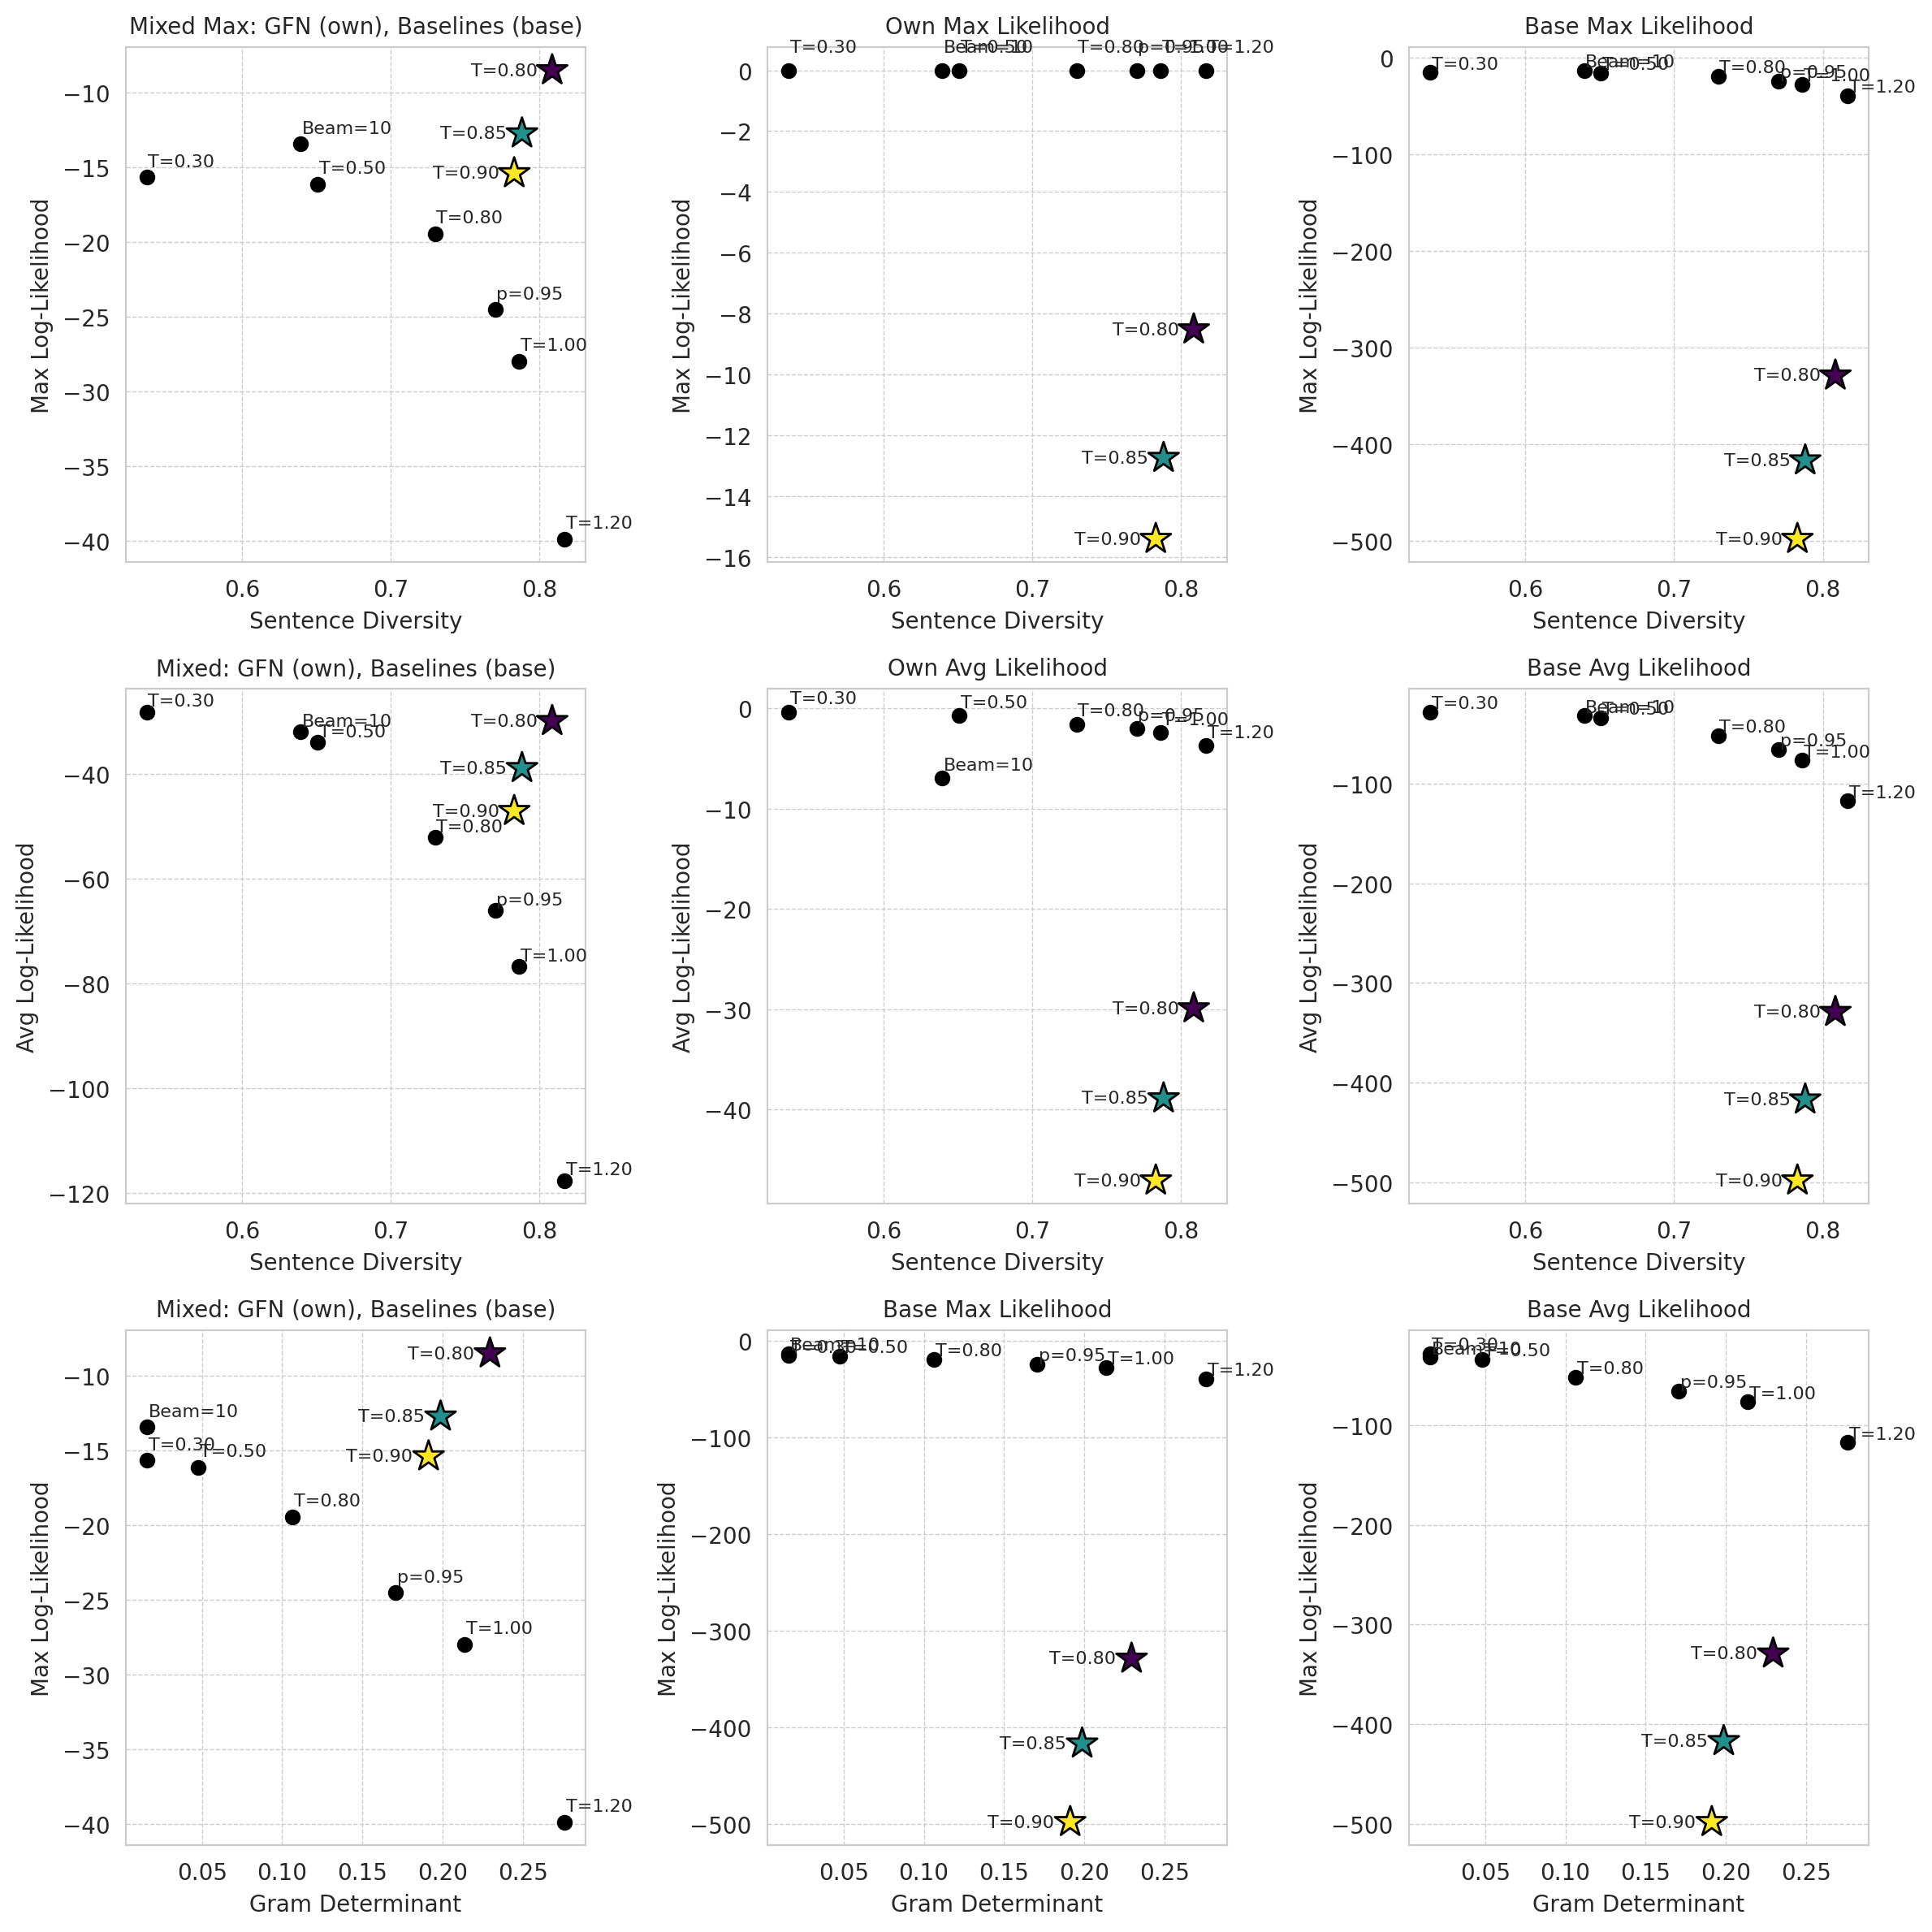

In [13]:
df = pd.read_csv("results.csv")
baseline = df[df["type"] != "gflownet"]
gfn = df[df["type"] == "gflownet"]

plt.rcParams['figure.dpi'] = 200
plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
})
sns.set_style("whitegrid")
fig, axs = plt.subplots(3, 3, figsize=(12, 12), sharex=False, sharey=False)
for i, (row_label, x_metric) in enumerate([("Sentence Diversity", "diversity"),
                                           ("Sentence Diversity", "diversity"),
                                           ("Gram Determinant", "det")]):
    for j in range(3):
        ax = axs[i, j]
        if i == 0:  # Row 0: max likelihood evaluations (x: diversity)
            if j == 0:
                y_baseline = "max_likelihood"
                y_gfn = "max_likelihood_own"
                eval_note = "Mixed Max: GFN (own), Baselines (base)"
            elif j == 1:
                y_baseline = "max_likelihood_own"
                y_gfn = "max_likelihood_own"
                eval_note = "Own Max Likelihood"
            elif j == 2:
                y_baseline = "max_likelihood"
                y_gfn = "max_likelihood"
                eval_note = "Base Max Likelihood"
        elif i == 1:  # Row 1: avg likelihood evaluations (x: diversity)
            if j == 0:
                y_baseline = "avg_likelihood"
                y_gfn = "avg_likelihood_own"
                eval_note = "Mixed: GFN (own), Baselines (base)"
            elif j == 1:
                y_baseline = "avg_likelihood_own"
                y_gfn = "avg_likelihood_own"
                eval_note = "Own Avg Likelihood"
            elif j == 2:
                y_baseline = "avg_likelihood"
                y_gfn = "avg_likelihood"
                eval_note = "Base Avg Likelihood"
        else:  # Row 2: x is det
            if j == 0:
                y_baseline = "max_likelihood"
                y_gfn = "max_likelihood_own"
                eval_note = "Mixed: GFN (own), Baselines (base)"
            elif j == 1:
                y_baseline = "max_likelihood"
                y_gfn = "max_likelihood"
                eval_note = "Base Max Likelihood"
            elif j == 2:
                y_baseline = "avg_likelihood"
                y_gfn = "avg_likelihood"
                eval_note = "Base Avg Likelihood"
        
        # Plot baseline points (black dots)
        ax.scatter(baseline[x_metric], baseline[y_baseline],
                   color='black', label='Baselines', zorder=3)
        # Annotate baseline points
        for _, row in baseline.iterrows():
            if row["type"] == "ancestral":
                ann = f"T={row['temp']:.2f}"
            elif row["type"] == "top-p":
                ann = f"p={row['temp']:.2f}"
            elif row["type"] == "beam":
                ann = f"Beam={int(row['temp'])}"
            else:
                ann = ""
            ax.text(row[x_metric] + 0.001, row[y_baseline] + 0.5, ann,
                    fontsize=8, ha='left', va='bottom')
        
        # Plot GFlowNet points (colored stars)
        sc = ax.scatter(gfn[x_metric], gfn[y_gfn], c=gfn["temp"],
                        cmap="viridis", s=200, marker="*", edgecolor='k',
                        label='GFlowNet', zorder=4)
        for _, row in gfn.iterrows():
            ax.text(row[x_metric] - 0.01, row[y_gfn], f"T={row['temp']:.2f}",
                    fontsize=8, ha='right', va='center')
        
        # Set labels and title for each subplot
        xlabel = "Sentence Diversity" if x_metric == "diversity" else "Gram Determinant"
        ax.set_xlabel(xlabel, fontsize=10)
        # Choose ylabel based on evaluation row
        if i in [0, 2]:
            ylabel = "Max Log-Likelihood"
        else:
            ylabel = "Avg Log-Likelihood"
        ax.set_ylabel(ylabel, fontsize=10)
        ax.set_title(f"{eval_note}", fontsize=10)
        ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Add one common colorbar for all subplots (for GFlowNet temperature)
norm = colors.Normalize(vmin=df["temp"].min(), vmax=df["temp"].max())
sm = cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])
# fig.colorbar(sm, ax=axs.ravel().tolist(), label="Temperature (GFlowNet)")

plt.tight_layout()
plt.show()
